In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_cr_raw = pd.read_csv('data/SR-EELS-Profil_SM125_-15%/Cr-Profil_raw.csv')
df_fe_raw = pd.read_csv('data/SR-EELS-Profil_SM125_-15%/Fe-Profil_raw.csv')
df_cr = pd.read_csv('data/SR-EELS-Profil_SM125_-15%/Cr-Profil.csv')
df_fe = pd.read_csv('data/SR-EELS-Profil_SM125_-15%/Fe-Profil.csv')

disp_lat_raw = 0.304351671
disp_lat = 0.2271546

xs = [x * disp_lat for x in range(len(df_cr_raw))]
df_cr_raw['X0'] = xs
df_fe_raw['X0'] = xs
xs = [x * disp_lat for x in range(len(df_cr))]
df_cr['X0'] = xs
df_fe['X0'] = xs

df_cr_raw = df_cr_raw[(df_cr_raw.X0 >= 350) & (df_cr_raw.X0 <= 600)]
df_fe_raw = df_fe_raw[(df_fe_raw.X0 >= 350) & (df_fe_raw.X0 <= 600)]

df_cr = df_cr[(df_cr.X0 >= 520) & (df_cr.X0 <= 760)]
df_fe = df_fe[(df_fe.X0 >= 520) & (df_fe.X0 <= 760)]

## Plot der Rohdaten

Das Chrom-Signal ist wesentlich höher, als das von Eisen. Schon hier ist zu sehen, dass es eine kleine verschiebung gibt.

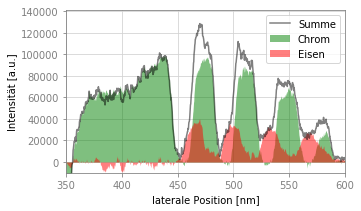

In [2]:
plt.figure(figsize=(5, 3))
plt.fill_between(df_cr_raw.X0, df_cr_raw.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe_raw.X0, df_fe_raw.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr_raw.X0, df_cr_raw.Y0 + df_fe_raw.Y0, label='Summe', c='k', alpha=0.5)
plt.xlim(350, 600)
plt.ylim(-10000, 1.1 * np.max(df_cr_raw.Y0 + df_fe_raw.Y0))
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='upper right')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_Linescan_raw')
plt.show()

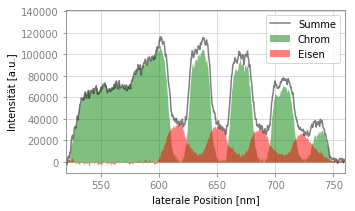

In [3]:
plt.figure(figsize=(5, 3))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr.X0, df_cr.Y0 + df_fe.Y0, label='Summe', c='k',alpha=0.5)
plt.xlim(520, 760)
plt.ylim(-10000, 1.1 * np.max(df_cr_raw.Y0 + df_fe_raw.Y0))
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='upper right')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_Linescan')
plt.show()

## Plot mit auf 1 normierter Intensität

Chrom und Eisen lassen sich auf diese WEise besser miteinander vergleichen. Hier ist deutlich zu erkennen, dass Eisen etwas zu weit nach links verschoben ist.

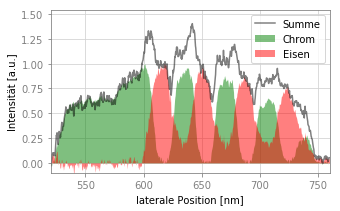

In [4]:
plt.figure(figsize=(5, 3))
plt.fill_between(df_cr.X0, df_cr.Y0 / df_cr.Y0.max(), label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0, df_fe.Y0 / df_fe.Y0.max(), label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr.X0, df_cr.Y0 / df_cr.Y0.max() + df_fe.Y0 / df_fe.Y0.max(), label='Summe', c='k',alpha=0.5)
plt.xlim(520, 760)
plt.ylim(-0.1, 1.1 * np.max(df_cr.Y0 / df_cr.Y0.max() + df_fe.Y0 / df_fe.Y0.max()))
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='upper right')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_Linescan_norm')
plt.show()

## Plot mit einer Verschiebung von Eisen um 2,5 nm

Durch Minimierung der Standardabweichung versuche ich die optimale Verschiebung zu bestimmen. Das Ergebnis ist etwas größer, als bei der manuellen Bestimmung, für die ich 2,4 nm erhalten hatte.

Auf diese Weise passen die beiden linken Peaks besser in die Minima von Chrom. Die beiden rechten Peaks sind jedoch zu breit.

In [5]:
norm_cs = df_cr.Y0 / df_cr.Y0.max()
norm_fe = df_fe.Y0 / df_fe.Y0.max()
ys = lambda shift: norm_cs + norm_fe.shift(shift)
# Bei einem Produkt stimmt der automatisch bestimmte Wert besser mit dem manuell bestimmten Wert überein.
prods = lambda shift: norm_cs * norm_fe.shift(shift)

shift_opt = 0
stdv_opt = prods(0).std()
for offset in range(1, 31):
    stdv = prods(offset).std()
    print(offset, stdv)
    if stdv < stdv_opt:
        shift_opt = offset
        stdv_opt = stdv
shift_opt, shift_opt * disp_lat

1 0.110211581223
2 0.107935403193
3 0.105865267087
4 0.104017617762
5 0.102374456794
6 0.100942436627
7 0.099754535365
8 0.0988233562757
9 0.0981229538919
10 0.0976462602726
11 0.0974318291406
12 0.0975040942898
13 0.0978542709949
14 0.0984735231626
15 0.0993540090407
16 0.100460829184
17 0.101795598749
18 0.103363366965
19 0.105184926763
20 0.107263309035
21 0.109544192692
22 0.112000334691
23 0.114625532919
24 0.117391863022
25 0.12027430465
26 0.12323969014
27 0.126297000365
28 0.12941759817
29 0.132583861526
30 0.135800331761


(11, 2.4987006000000003)

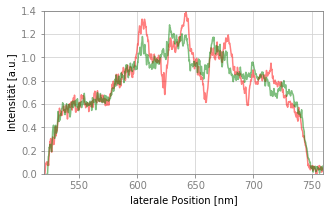

In [6]:
plt.figure(figsize=(5, 3))
plt.plot(df_cr.X0, ys(0), c='r',alpha=0.5)
plt.plot(df_cr.X0, ys(shift_opt), c='g',alpha=0.5)
plt.xlim(520, 760)
plt.ylim(0, ys(0).max())
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.show()

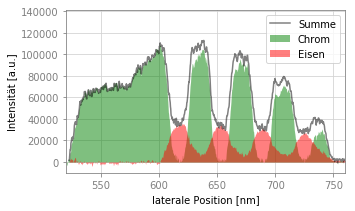

In [7]:
plt.figure(figsize=(5, 3))
plt.fill_between(df_cr.X0, df_cr.Y0, label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0, label='Eisen', color='r', lw=0, alpha=0.5)
ys_raw = lambda shift: df_cr.Y0 + df_fe.Y0.shift(shift)
plt.plot(df_cr.X0, ys_raw(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(520, 760)
plt.ylim(-10000, 1.1 * np.max(df_cr_raw.Y0 + df_fe_raw.Y0))
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='upper right')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_Linescan2')
plt.show()

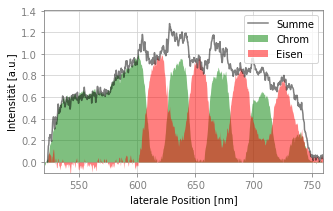

In [8]:
plt.figure(figsize=(5, 3))
plt.fill_between(df_cr.X0, df_cr.Y0 / df_cr.Y0.max(), label='Chrom', color='g', lw=0, alpha=0.5)
plt.fill_between(df_fe.X0 + shift_opt * disp_lat, df_fe.Y0 / df_fe.Y0.max(), label='Eisen', color='r', lw=0, alpha=0.5)
plt.plot(df_cr.X0, ys(shift_opt), label='Summe', c='k',alpha=0.5)
plt.xlim(520, 760)
plt.ylim(-0.1, 1.1 * ys(shift_opt).max())
plt.xlabel('laterale Position [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='upper right')
plt.savefig('Bilder/SR-EELS_FeCr_SM125_Linescan2_norm')
plt.show()